## Evaluation

In [1]:
from transformers import AutoModelForSequenceClassification #, TrainingArguments, Trainer
from transformers import AlbertTokenizer #, AlbertModel
from transformers import TextClassificationPipeline

tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2', max_length=512)

In [2]:
#this one only had 20000 in np.sample(total_from_feather), so i need to redo the initial train
model = AutoModelForSequenceClassification.from_pretrained("/home/deimann/mbti-project/balanced_train_MBTIonly/checkpoint-4696", num_labels=16)
pipeline = TextClassificationPipeline(model=model, tokenizer=tokenizer, max_length=512, truncation=True, device=1)

In [36]:
import pandas as pd 

df = pd.read_feather("//media/data/mbti-reddit/preprocessed_df_new.feather") 
df=pd.concat([df,df.sample(80000, random_state=1)]).drop_duplicates(keep=False) #drops the subset that has been used for training/testing
df=df.drop(columns=['authors','subreddit'])

#final test set
df=df.sample(20000, random_state=42) 

In [7]:
#balanced dataset

df = pd.read_feather('/media/data/mbti-reddit/disprop_sample100k_total.feather')
df=pd.concat([df,df.sample(80000, random_state=1)]).drop_duplicates(keep=False) #drops the subset that has been used for training/testing
df=df.drop(columns=['authors','subreddit'])

In [7]:
#MBTI only

df = pd.read_feather('/media/data/mbti-reddit/disprop_sample100k_total.feather')
df=pd.concat([df,pd.read_feather("/media/data/mbti-reddit/disprop_sample50k_mbtionly.feather")]).drop_duplicates(keep=False) #drops the subset that has been used for training/testing
df=df.sample(10000, random_state=42) 

In [8]:
from sklearn.metrics import classification_report

true_labels = df['labels'].to_list()
predicted_labels = []

text = df['comments'].to_list()

for test in text:
  predicted_label = pipeline(test)[0]['label']
  if predicted_label == 'LABEL_0':
    predicted_labels.append('INTP')
  elif predicted_label == 'LABEL_1':
    predicted_labels.append('ISTP')
  elif predicted_label == 'LABEL_2':
    predicted_labels.append('ENTP')
  elif predicted_label == 'LABEL_3':
    predicted_labels.append('ESTP')
  elif predicted_label == 'LABEL_4':
    predicted_labels.append('INFP')
  elif predicted_label == 'LABEL_5':
    predicted_labels.append('ISFP')
  elif predicted_label == 'LABEL_6':
    predicted_labels.append('ENFP')
  elif predicted_label == 'LABEL_7':
    predicted_labels.append('ESFP')
  elif predicted_label == 'LABEL_8':
    predicted_labels.append('INTJ')
  elif predicted_label == 'LABEL_9':
    predicted_labels.append('ISTJ')
  elif predicted_label == 'LABEL_10':
    predicted_labels.append('ENTJ')
  elif predicted_label == 'LABEL_11':
    predicted_labels.append('ESTJ')
  elif predicted_label == 'LABEL_12':
    predicted_labels.append('INFJ')
  elif predicted_label == 'LABEL_13':
    predicted_labels.append('ISFJ')
  elif predicted_label == 'LABEL_14':
    predicted_labels.append('ENFJ')
  elif predicted_label == 'LABEL_15':
    predicted_labels.append('ESFJ')
  else:
    print("unexpected label")
    print(predicted_label)
  

In [9]:
d = {'True':true_labels, 'Predicted':predicted_labels}
truefalseinitial_old=pd.DataFrame(d)
truefalseinitial_old.to_csv('/home/deimann/mbti-eval/16/baltrainMBTIonly_classification_baleval_corrected_cp4696.csv')

#### For the dataset trained on only 20.000 examples we have the following result:
intial dataset, checkpoint 20000

In [8]:
print(classification_report(true_labels,predicted_labels))

              precision    recall  f1-score   support

        ENFJ       0.08      0.06      0.07       643
        ENFP       0.08      0.05      0.06       897
        ENTJ       0.09      0.06      0.07       681
        ENTP       0.15      0.19      0.17      2172
        ESFJ       0.13      0.05      0.08       282
        ESFP       0.15      0.10      0.12       464
        ESTJ       0.18      0.04      0.07       278
        ESTP       0.08      0.04      0.05       704
        INFJ       0.14      0.17      0.15      1923
        INFP       0.18      0.23      0.20      2470
        INTJ       0.18      0.19      0.18      2314
        INTP       0.29      0.35      0.32      3764
        ISFJ       0.09      0.07      0.08       681
        ISFP       0.10      0.06      0.07       920
        ISTJ       0.15      0.14      0.15       995
        ISTP       0.07      0.05      0.05       812

    accuracy                           0.18     20000
   macro avg       0.13   

#### For the dataset trained on 20.000 examples but a better checkpoint we got the following result:
(initial dataset, checkpoint 5000)

In [15]:
print(classification_report(true_labels,predicted_labels, zero_division=0.0))

              precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00       643
        ENFP       0.00      0.00      0.00       897
        ENTJ       0.00      0.00      0.00       681
        ENTP       0.17      0.04      0.07      2172
        ESFJ       0.53      0.03      0.06       282
        ESFP       0.33      0.00      0.01       464
        ESTJ       0.00      0.00      0.00       278
        ESTP       0.00      0.00      0.00       704
        INFJ       0.15      0.14      0.14      1923
        INFP       0.16      0.29      0.21      2470
        INTJ       0.19      0.12      0.15      2314
        INTP       0.23      0.71      0.35      3764
        ISFJ       0.00      0.00      0.00       681
        ISFP       0.00      0.00      0.00       920
        ISTJ       0.24      0.05      0.08       995
        ISTP       0.00      0.00      0.00       812

    accuracy                           0.20     20000
   macro avg       0.12   

#### For the dataset trained on 80.000 examples we got the following results:
initial dataset2, checkpoint 5334

In [9]:
print(classification_report(true_labels,predicted_labels, zero_division=0.0))

              precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00       672
        ENFP       0.33      0.00      0.00       969
        ENTJ       0.44      0.02      0.04       696
        ENTP       0.22      0.06      0.09      2132
        ESFJ       0.40      0.06      0.11       267
        ESFP       0.48      0.05      0.09       461
        ESTJ       0.00      0.00      0.00       272
        ESTP       0.60      0.00      0.01       737
        INFJ       0.17      0.08      0.11      1900
        INFP       0.15      0.39      0.22      2408
        INTJ       0.19      0.16      0.17      2266
        INTP       0.25      0.65      0.36      3824
        ISFJ       0.00      0.00      0.00       730
        ISFP       0.00      0.00      0.00       880
        ISTJ       0.24      0.12      0.16       967
        ISTP       1.00      0.01      0.02       819

    accuracy                           0.21     20000
   macro avg       0.28   

#### For the dataset trained on 80.000 examples we got the following results:
initial dataset2, checkpoint 17780

In [13]:
print(classification_report(true_labels,predicted_labels, zero_division=0.0))

              precision    recall  f1-score   support

        ENFJ       0.09      0.06      0.07       672
        ENFP       0.11      0.06      0.08       969
        ENTJ       0.10      0.05      0.06       696
        ENTP       0.15      0.20      0.17      2132
        ESFJ       0.28      0.09      0.14       267
        ESFP       0.15      0.10      0.12       461
        ESTJ       0.21      0.02      0.04       272
        ESTP       0.10      0.04      0.05       737
        INFJ       0.13      0.13      0.13      1900
        INFP       0.17      0.24      0.20      2408
        INTJ       0.16      0.20      0.18      2266
        INTP       0.28      0.38      0.32      3824
        ISFJ       0.09      0.04      0.06       730
        ISFP       0.08      0.03      0.05       880
        ISTJ       0.17      0.18      0.17       967
        ISTP       0.08      0.04      0.05       819

    accuracy                           0.18     20000
   macro avg       0.15   

#### Weighted dataset, with all classes having equal propability, on same testset
Balanced train, same test set, CP 5000

In [39]:
print(classification_report(true_labels,predicted_labels, zero_division=0.0))

              precision    recall  f1-score   support

        ENFJ       0.07      0.22      0.11       672
        ENFP       0.11      0.16      0.13       969
        ENTJ       0.08      0.07      0.08       696
        ENTP       0.24      0.03      0.06      2132
        ESFJ       0.12      0.18      0.14       267
        ESFP       0.13      0.25      0.17       461
        ESTJ       0.03      0.29      0.05       272
        ESTP       0.07      0.23      0.11       737
        INFJ       0.15      0.06      0.08      1900
        INFP       0.16      0.11      0.13      2408
        INTJ       0.18      0.10      0.13      2266
        INTP       0.47      0.17      0.25      3824
        ISFJ       0.11      0.12      0.11       730
        ISFP       0.07      0.10      0.09       880
        ISTJ       0.15      0.19      0.17       967
        ISTP       0.08      0.10      0.09       819

    accuracy                           0.13     20000
   macro avg       0.14   

#### Weighted dataset, with all classes having equal propability, on same testset
Balanced train, same test set, CP 17500

In [45]:
print(classification_report(true_labels,predicted_labels, zero_division=0.0))

              precision    recall  f1-score   support

        ENFJ       0.08      0.10      0.09       672
        ENFP       0.12      0.13      0.12       969
        ENTJ       0.08      0.16      0.11       696
        ENTP       0.15      0.14      0.15      2132
        ESFJ       0.10      0.29      0.14       267
        ESFP       0.13      0.16      0.14       461
        ESTJ       0.05      0.18      0.08       272
        ESTP       0.09      0.15      0.12       737
        INFJ       0.13      0.11      0.12      1900
        INFP       0.18      0.10      0.13      2408
        INTJ       0.19      0.11      0.14      2266
        INTP       0.43      0.16      0.23      3824
        ISFJ       0.09      0.18      0.12       730
        ISFP       0.07      0.15      0.09       880
        ISTJ       0.17      0.18      0.18       967
        ISTP       0.09      0.10      0.09       819

    accuracy                           0.14     20000
   macro avg       0.13   

#### Initial Dataset (80.000) with unbalanced classes inferencing on dataset with balanced classes:
Initial2 train, CP 17780

In [52]:
print(classification_report(true_labels,predicted_labels, zero_division=0.0))

              precision    recall  f1-score   support

        ENFJ       0.10      0.04      0.06      1225
        ENFP       0.11      0.06      0.07      1292
        ENTJ       0.20      0.07      0.10      1239
        ENTP       0.10      0.21      0.13      1270
        ESFJ       0.56      0.09      0.15      1229
        ESFP       0.29      0.09      0.14      1258
        ESTJ       0.71      0.02      0.05      1293
        ESTP       0.15      0.03      0.06      1229
        INFJ       0.10      0.15      0.12      1245
        INFP       0.08      0.21      0.11      1255
        INTJ       0.10      0.22      0.14      1209
        INTP       0.11      0.38      0.17      1287
        ISFJ       0.24      0.08      0.12      1231
        ISFP       0.11      0.04      0.06      1206
        ISTJ       0.23      0.19      0.21      1306
        ISTP       0.16      0.05      0.08      1226

    accuracy                           0.12     20000
   macro avg       0.21   

#### Balanced Dataset (80.000)  inferencing on dataset with balanced classes:
Balanced_train, CP 17780 (but has training set included)

In [57]:
print(classification_report(true_labels,predicted_labels, zero_division=0.0))

              precision    recall  f1-score   support

        ENFJ       0.16      0.25      0.19      1225
        ENFP       0.16      0.21      0.18      1292
        ENTJ       0.17      0.24      0.20      1239
        ENTP       0.20      0.07      0.10      1270
        ESFJ       0.30      0.42      0.35      1229
        ESFP       0.30      0.38      0.34      1258
        ESTJ       0.24      0.35      0.29      1293
        ESTP       0.23      0.21      0.22      1229
        INFJ       0.15      0.07      0.09      1245
        INFP       0.16      0.09      0.12      1255
        INTJ       0.17      0.15      0.16      1209
        INTP       0.29      0.24      0.26      1287
        ISFJ       0.28      0.19      0.23      1231
        ISFP       0.17      0.12      0.14      1206
        ISTJ       0.30      0.42      0.35      1306
        ISTP       0.21      0.18      0.19      1226

    accuracy                           0.22     20000
   macro avg       0.22   

#### Balanced Dataset (80.000)  inferencing on dataset with balanced classes:
Balanced_train, CP 17780, but this time no training subset included:

In [12]:
print(classification_report(true_labels,predicted_labels, zero_division=0.0))

              precision    recall  f1-score   support

        ENFJ       0.11      0.18      0.14      1245
        ENFP       0.12      0.15      0.13      1273
        ENTJ       0.11      0.16      0.13      1229
        ENTP       0.14      0.05      0.07      1208
        ESFJ       0.22      0.33      0.26      1218
        ESFP       0.21      0.26      0.23      1292
        ESTJ       0.18      0.25      0.21      1286
        ESTP       0.16      0.14      0.15      1257
        INFJ       0.07      0.04      0.05      1223
        INFP       0.11      0.06      0.08      1238
        INTJ       0.12      0.10      0.11      1198
        INTP       0.19      0.16      0.18      1228
        ISFJ       0.19      0.13      0.15      1246
        ISFP       0.13      0.08      0.10      1239
        ISTJ       0.18      0.26      0.22      1290
        ISTP       0.13      0.10      0.12      1230

    accuracy                           0.15     19900
   macro avg       0.15   

#### Balanced Dataset MBTI only dataset (50.000)  inferencing on dataset with balanced classes:
Balanced_train, CP 4696, but this time no training subset included:

In [10]:
print(classification_report(true_labels,predicted_labels, zero_division=0.0))

              precision    recall  f1-score   support

        ENFJ       0.19      0.26      0.22       600
        ENFP       0.28      0.03      0.06       629
        ENTJ       0.12      0.12      0.12       584
        ENTP       0.13      0.07      0.09       637
        ESFJ       0.24      0.27      0.26       590
        ESFP       0.22      0.21      0.22       634
        ESTJ       0.23      0.23      0.23       635
        ESTP       0.16      0.20      0.18       619
        INFJ       0.11      0.10      0.10       633
        INFP       0.11      0.08      0.09       649
        INTJ       0.13      0.23      0.17       643
        INTP       0.15      0.15      0.15       634
        ISFJ       0.13      0.12      0.13       646
        ISFP       0.11      0.11      0.11       611
        ISTJ       0.24      0.26      0.25       574
        ISTP       0.15      0.20      0.17       682

    accuracy                           0.16     10000
   macro avg       0.17   

Predictions      ENFP      ENTP      ESFJ      ESFP      ESTP      INFJ  \
True                                                                      
ENFJ         0.000000  0.015552  0.000000  0.003110  0.000000  0.125972   
ENFP         0.000000  0.022297  0.000000  0.000000  0.000000  0.129320   
ENTJ         0.001468  0.038179  0.000000  0.000000  0.000000  0.086637   
ENTP         0.000000  0.040976  0.000000  0.000000  0.000000  0.080110   
ESFJ         0.000000  0.039007  0.031915  0.000000  0.000000  0.124113   
ESFP         0.002155  0.075431  0.002155  0.004310  0.000000  0.146552   
ESTJ         0.000000  0.035971  0.000000  0.000000  0.000000  0.086331   
ESTP         0.000000  0.032670  0.000000  0.000000  0.000000  0.041193   
INFJ         0.000000  0.023401  0.001560  0.000000  0.000000  0.139366   
INFP         0.000000  0.027935  0.000000  0.000405  0.000405  0.093927   
INTJ         0.000000  0.020743  0.000432  0.000000  0.000000  0.082973   
INTP         0.000000  0.

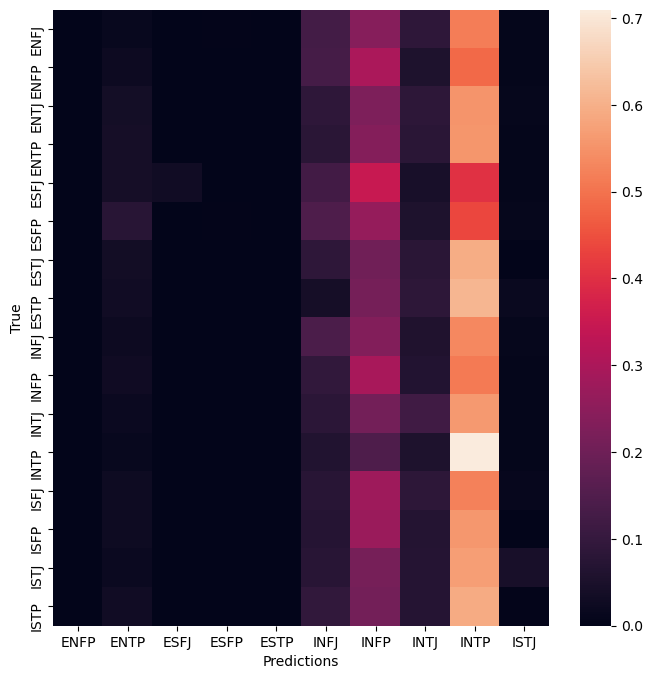

In [7]:
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd

pathlist=['/home/deimann/mbti-eval/16/balancedtrain_classification_cp5000.csv','/home/deimann/mbti-eval/16/balancedtrain_classification_cp17500.csv',
          '/home/deimann/mbti-eval/16/baltrain_classification_baleval_cp5500.csv','/home/deimann/mbti-eval/16/initialtrain_classification_old_cp5000.csv',
          '/home/deimann/mbti-eval/16/initialtrain_classification_old_cp20000.csv','/home/deimann/mbti-eval/16/initialtrain2_classification_new_cp5334.csv',
          '/home/deimann/mbti-eval/16/initialtrain2_classification_new_cp17780.csv','/home/deimann/mbti-eval/16/intialtrain2_classification_baleval_cp17780.csv']

#df = pd.read_csv('/home/deimann/mbti-eval/baltrain_classification_baleval_cp5500.csv')
df = pd.read_csv('/home/deimann/mbti-eval/16/initialtrain_classification_old_cp5000.csv')

true=df['True'].to_list()
predicted=df['Predicted'].to_list()

types=['INTP','ISTP','ENTP','ESTP','INFP','ISFP','ENFP','ESFP','INTJ','ISTJ','ENTJ','ESTJ','INFJ','ISFJ','ENFJ','ESFJ']

cross=pd.crosstab([true],[predicted],dropna=False,normalize='index',rownames=['True'],colnames=['Predictions'])#rownames=types, colnames=types)
print(cross)

#confmat = cm(true,predicted,labels=types)
#print(confmat)

plt.figure(figsize=(8, 8))
sn.heatmap(cross, annot=False)
plt.show()
#plt.savefig('cross_tabulation.heatmap.png', bbox_inches='tight')


/home/deimann/mbti-eval/16/balancedtrain_classification_cp5000.csv


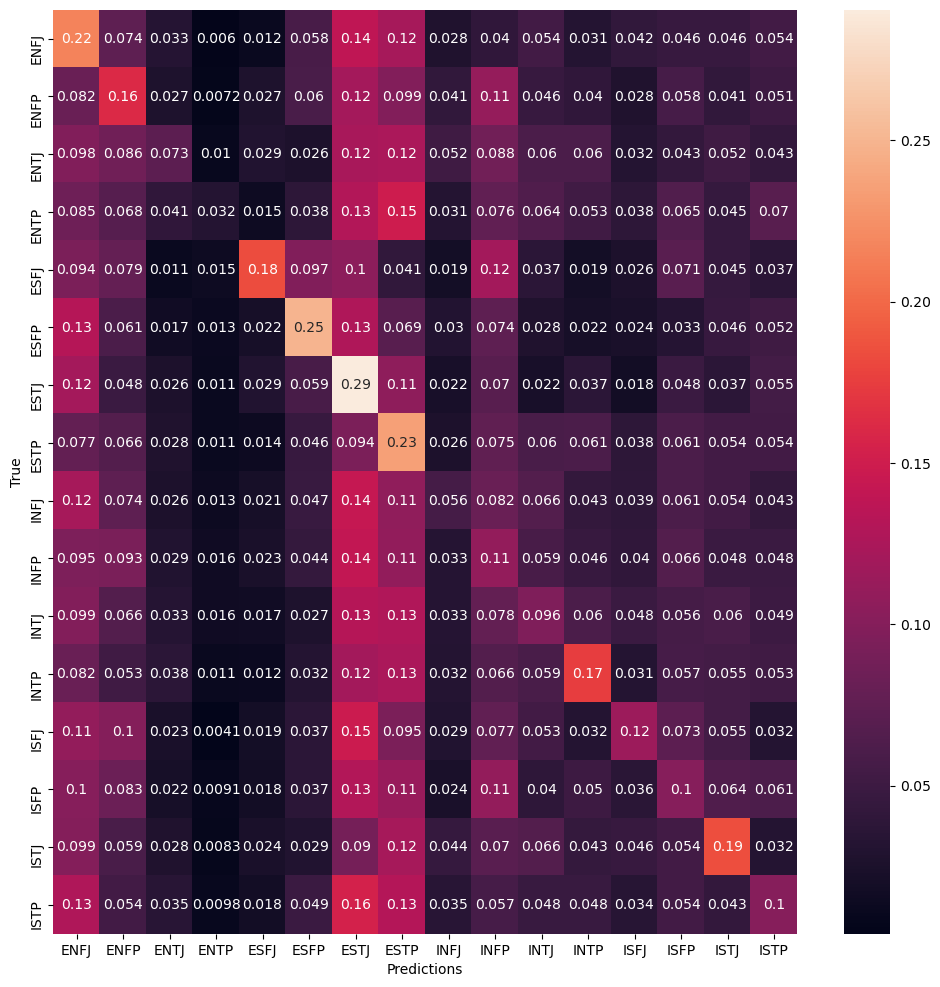

/home/deimann/mbti-eval/16/balancedtrain_classification_cp17500.csv


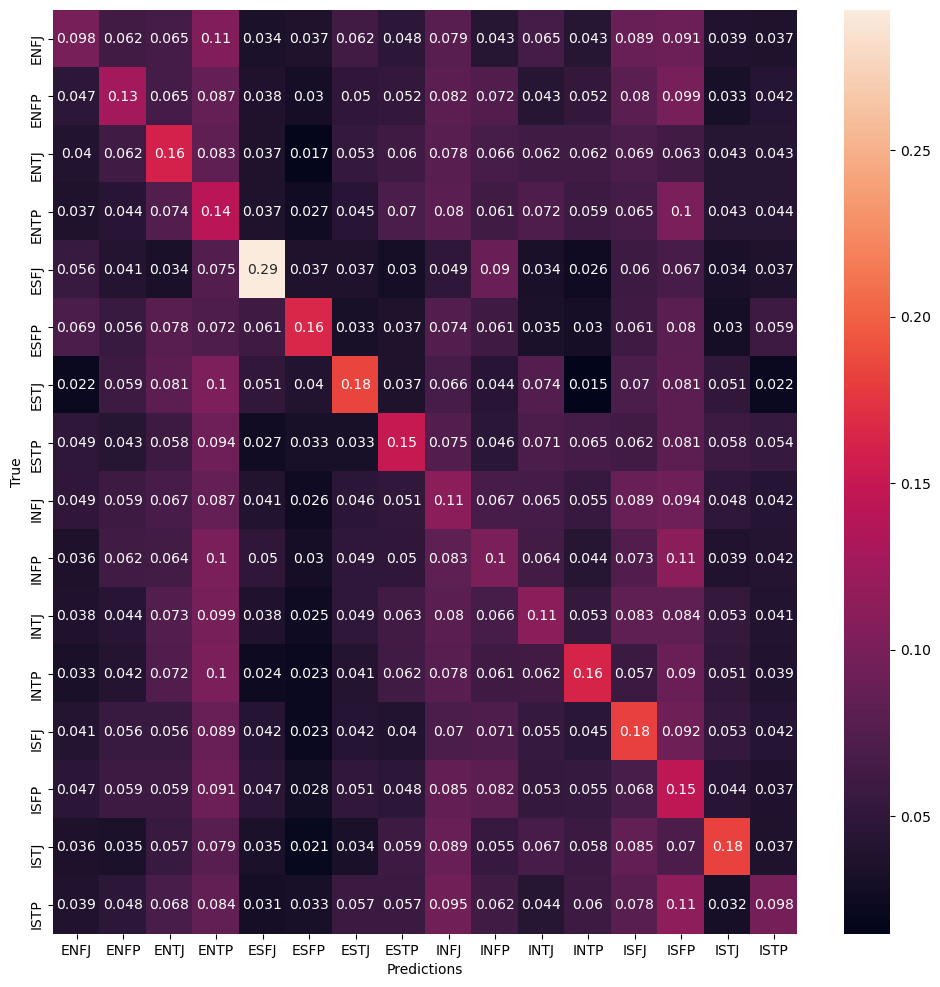

/home/deimann/mbti-eval/16/baltrain_classification_baleval_cp5500.csv


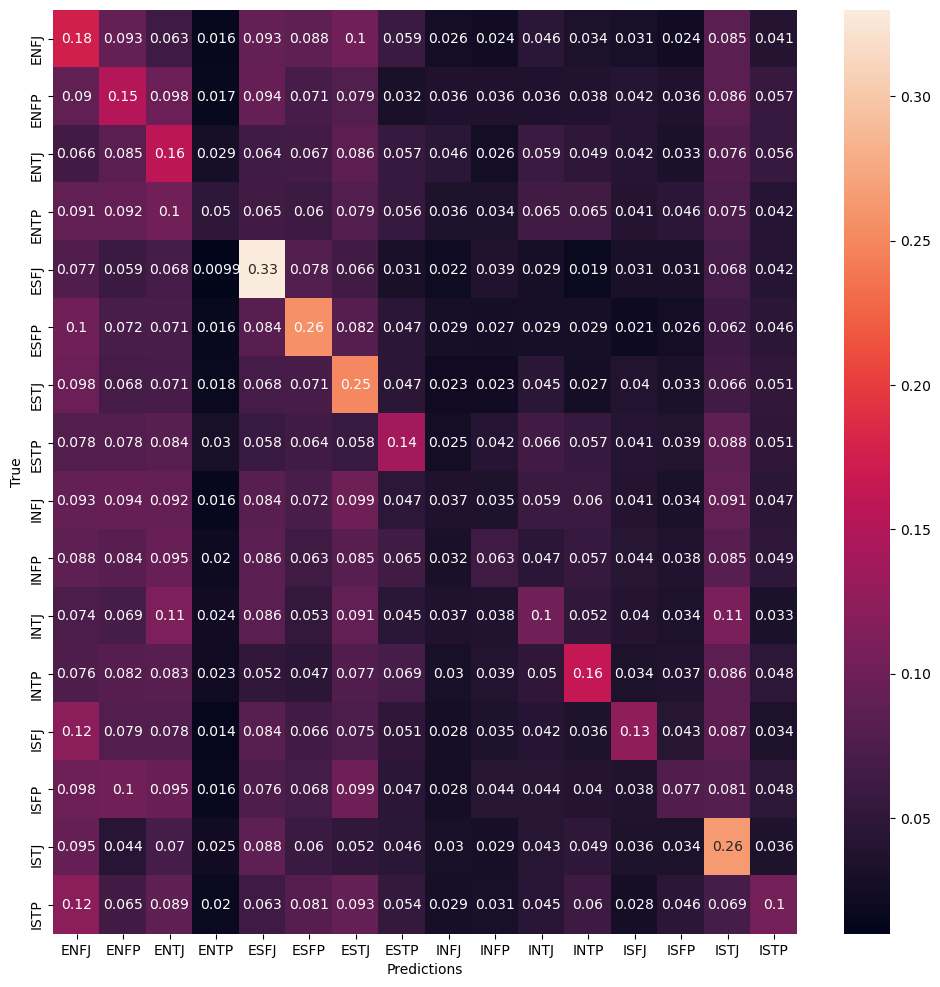

/home/deimann/mbti-eval/16/baltrain_classification_baleval_corrected_cp5500.csv


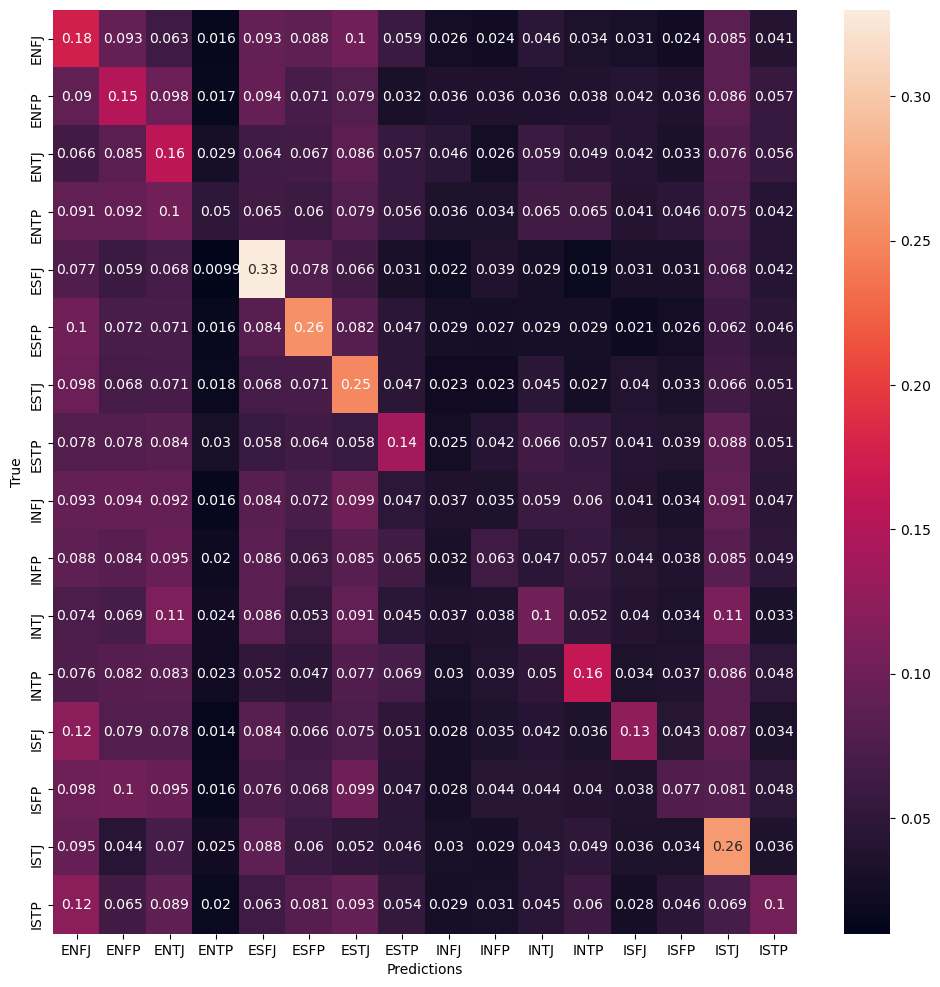

/home/deimann/mbti-eval/16/baltrainMBTIonly_classification_baleval_corrected_cp4696.csv


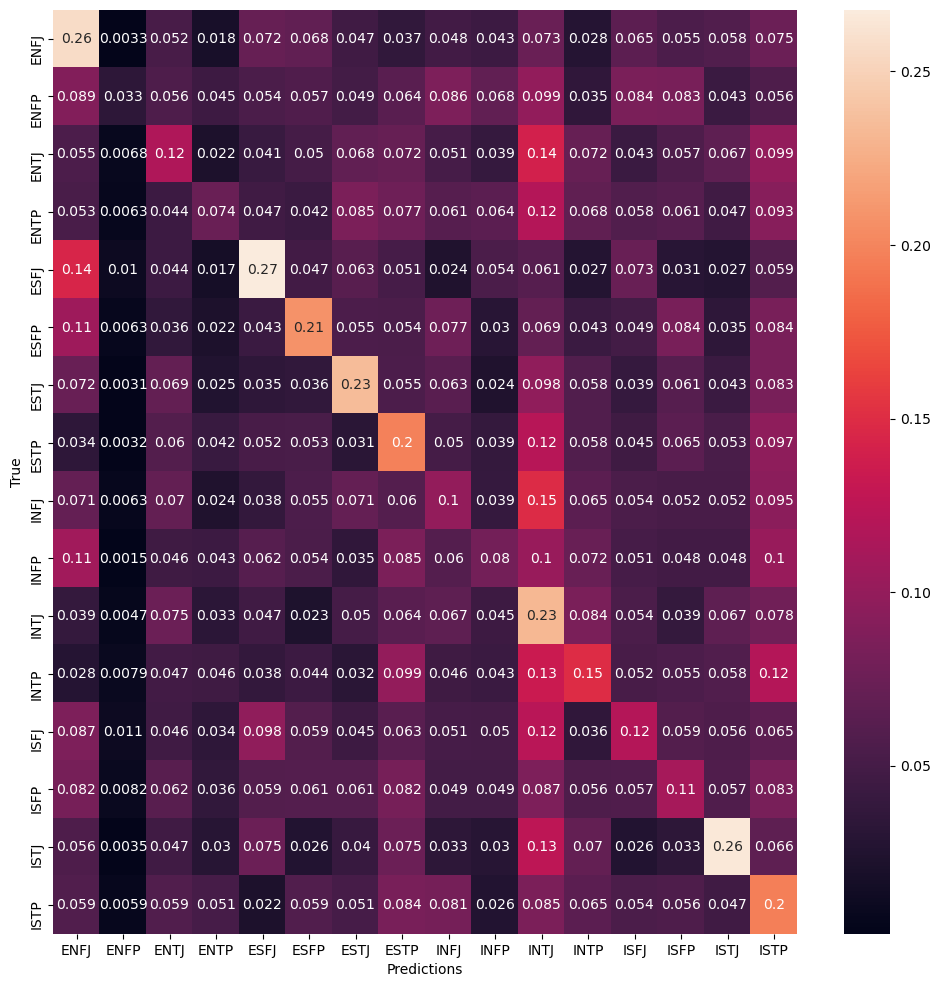

/home/deimann/mbti-eval/16/initialtrain_classification_old_cp5000.csv


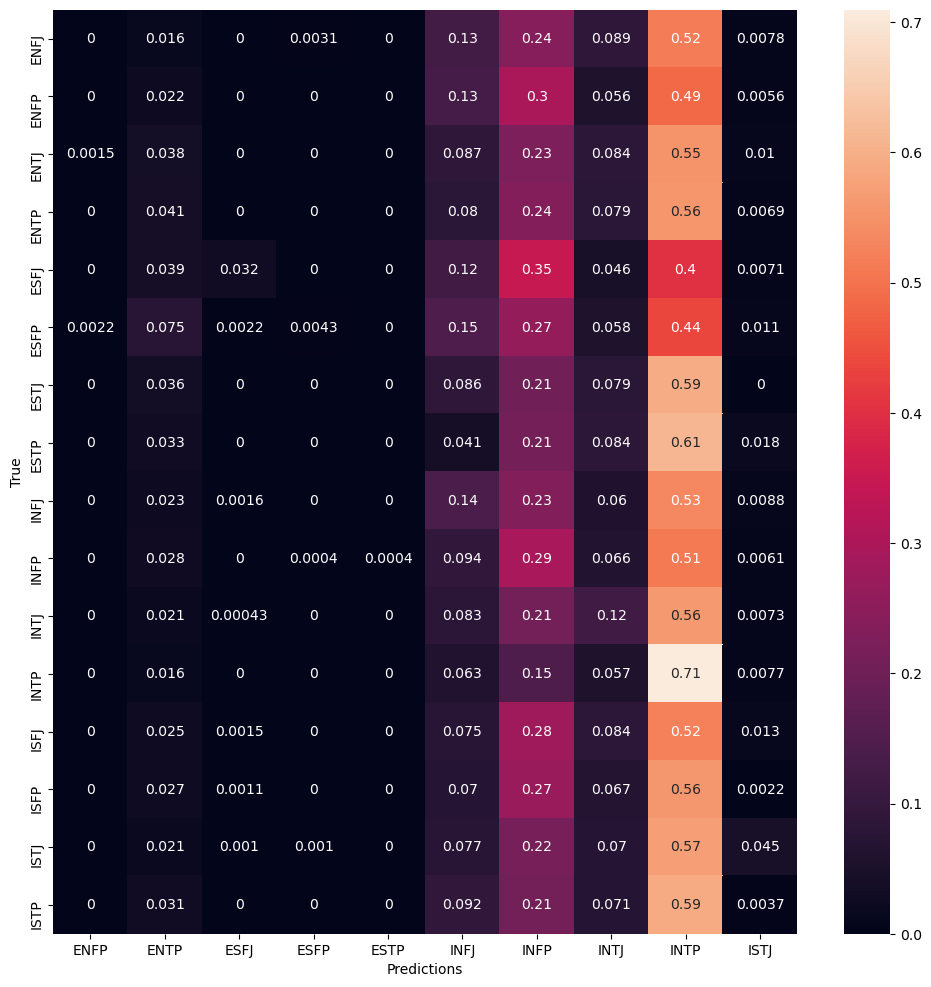

/home/deimann/mbti-eval/16/initialtrain_classification_old_cp20000.csv


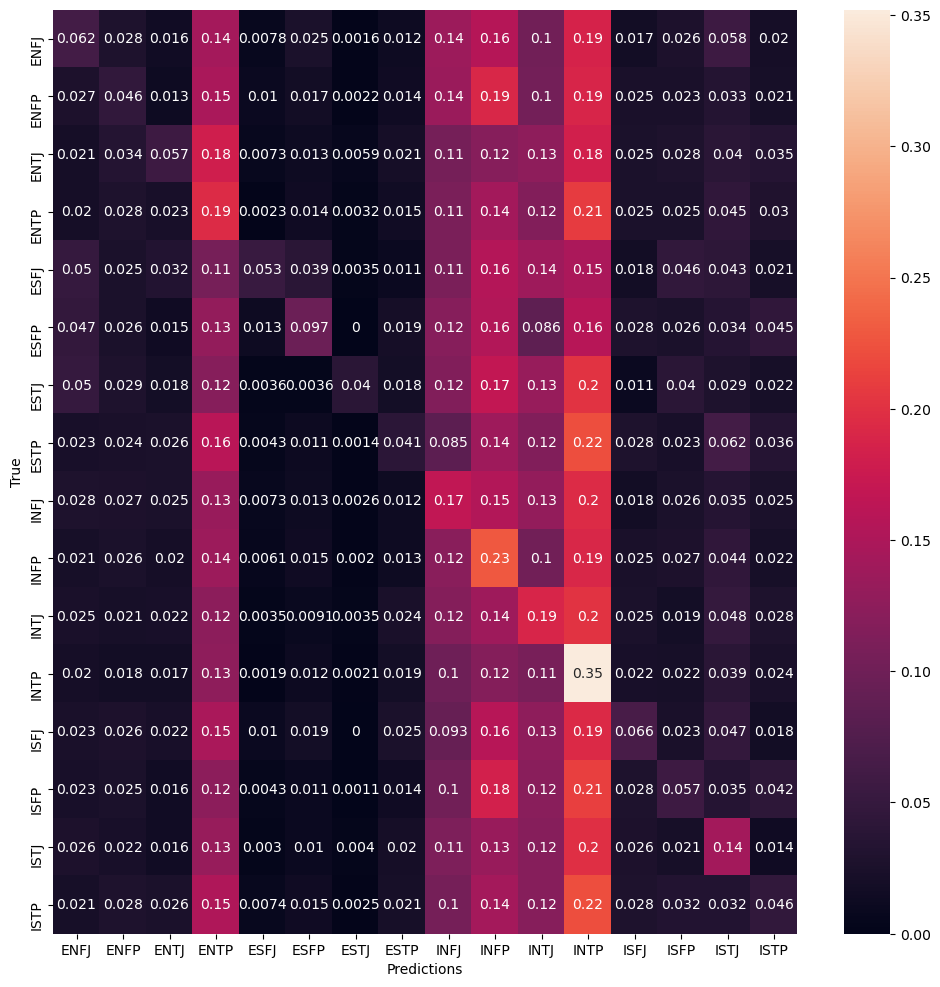

/home/deimann/mbti-eval/16/initialtrain2_classification_new_cp5334.csv


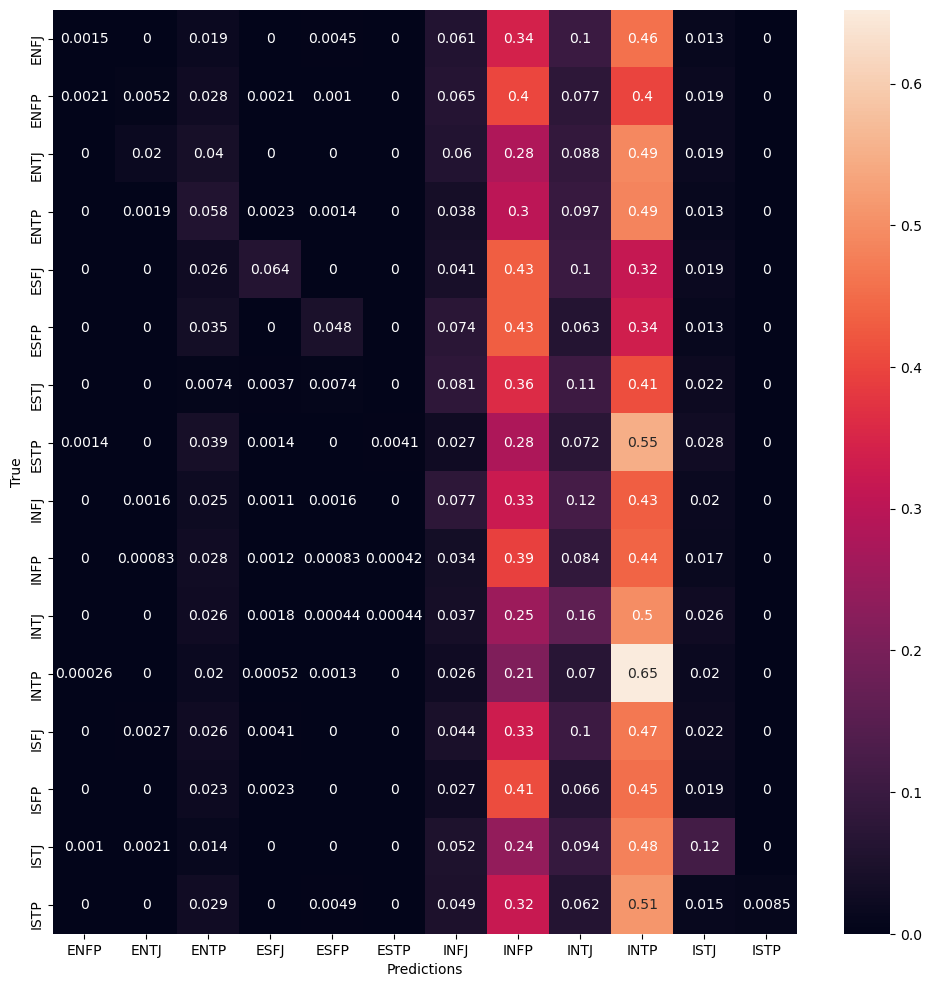

/home/deimann/mbti-eval/16/initialtrain2_classification_new_cp17780.csv


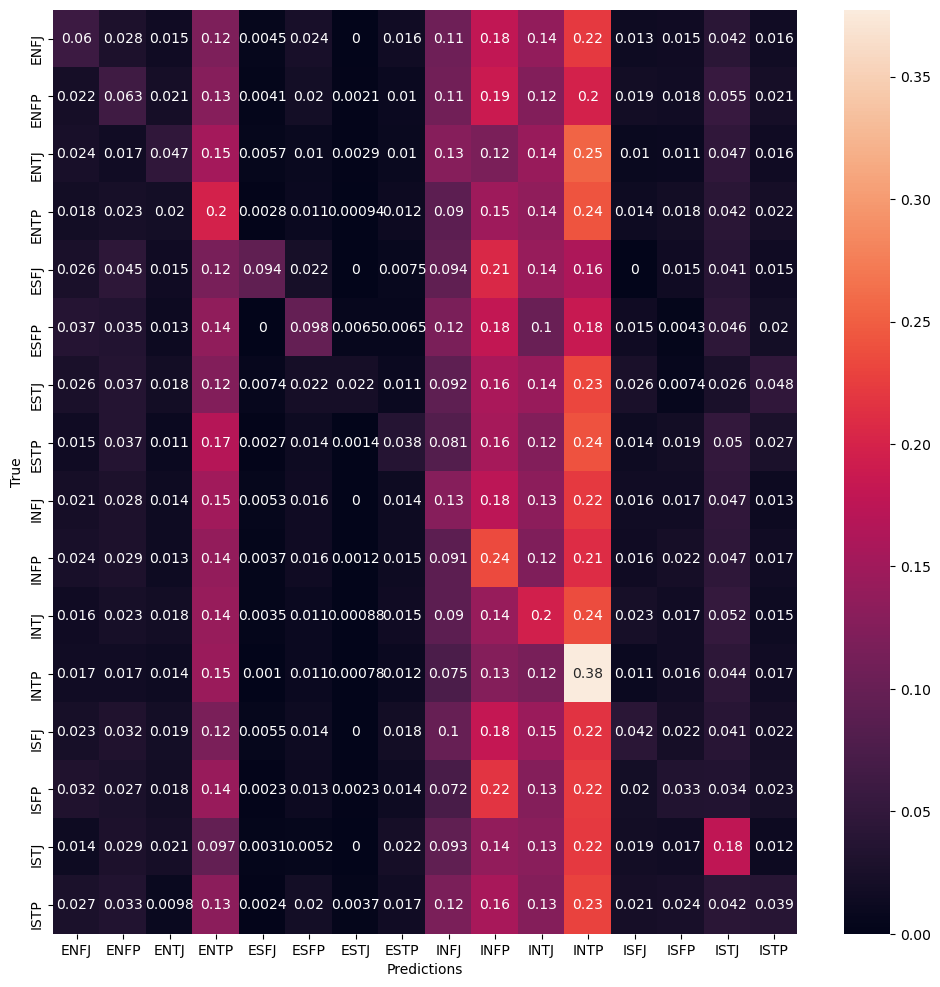

/home/deimann/mbti-eval/16/intialtrain2_classification_baleval_cp17780.csv


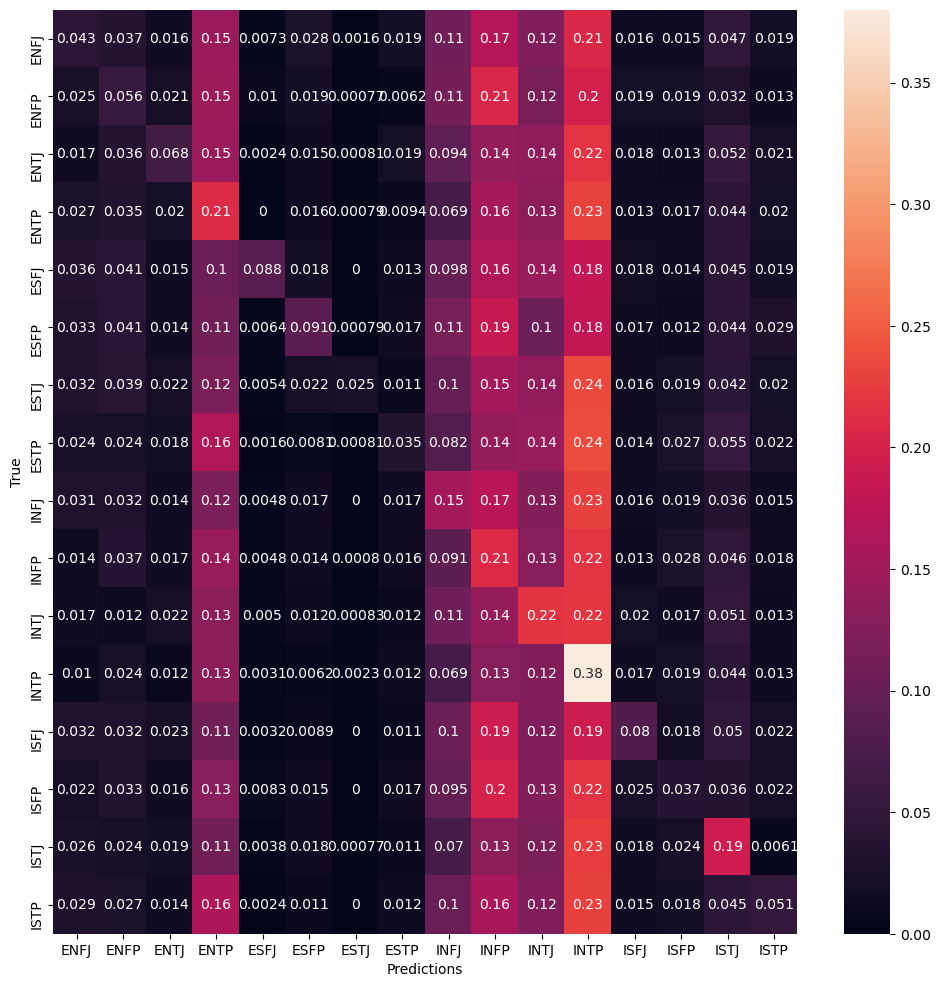

In [11]:
pathlist=['/home/deimann/mbti-eval/16/balancedtrain_classification_cp5000.csv','/home/deimann/mbti-eval/16/balancedtrain_classification_cp17500.csv',
          '/home/deimann/mbti-eval/16/baltrain_classification_baleval_cp5500.csv','/home/deimann/mbti-eval/16/baltrain_classification_baleval_corrected_cp5500.csv',
          '/home/deimann/mbti-eval/16/baltrainMBTIonly_classification_baleval_corrected_cp4696.csv','/home/deimann/mbti-eval/16/initialtrain_classification_old_cp5000.csv',
          '/home/deimann/mbti-eval/16/initialtrain_classification_old_cp20000.csv','/home/deimann/mbti-eval/16/initialtrain2_classification_new_cp5334.csv',
          '/home/deimann/mbti-eval/16/initialtrain2_classification_new_cp17780.csv','/home/deimann/mbti-eval/16/intialtrain2_classification_baleval_cp17780.csv']

for path in pathlist:

    df = pd.read_csv(path)

    true=df['True'].to_list()
    predicted=df['Predicted'].to_list()

    cross=pd.crosstab([true],[predicted],dropna=False,normalize='index',rownames=['True'],colnames=['Predictions'])

    print(path)
    plt.figure(figsize=(12, 12))
    sn.heatmap(cross, annot=True)
    plt.show()